# Title : Feedback-Driven System

# Objective

Objective: The goal is to create a feedback system where users can provide ratings on various aspects of a service or product. The system will then analyze the feedback to determine areas for improvement and visualize the results.

# 1. Import Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt


numpy: Used for numerical operations, particularly for calculating averages.
matplotlib.pyplot: Used for creating visualizations like bar charts.

# 2. Function: get_feedback(user_id)

This function collects feedback from a user.

In [28]:
def get_feedback(user_id):
    feedback = {}
    questions = [
        "How would you rate our service overall?",
        "How satisfied are you with the quality of our products?",
        "How would you rate the friendliness of our staff?",
        "How satisfied are you with the response time of our customer support?",
        "How likely are you to recommend us to others?"
    ]
    
    print(f"\nUser {user_id}'s Feedback:")
    for i, question in enumerate(questions, 1):
        while True:
            try:
                rating = int(input(f"Q{i}: {question} (0 to 4, where 0 means poor and 4 means excellent): "))
                if 0 <= rating <= 4:
                    break
                else:
                    print("Invalid input. Please enter a number between 0 and 4.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")

        feedback[f"Question_{i}_Rating"] = rating

    print("Thank you for your feedback!")
    return feedback


Inputs: Asks the user for feedback on five different questions, with ratings from 0 to 4.

Loop: For each question, it ensures valid input (0 to 4) and handles errors.

Output: Returns a dictionary where each key is the question number and each value is the user’s rating.

# 3. Function: 

Calculates the average ratings for each question from all users.

In [29]:
def calculate_average_ratings(all_feedbacks):
    num_questions = 5
    ratings = np.zeros((num_questions, len(all_feedbacks)))
    
    # Collect ratings for each question
    for i, feedback in enumerate(all_feedbacks):
        for q in range(num_questions):
            ratings[q, i] = feedback[f"Question_{q+1}_Rating"]
    
    # Calculate average ratings
    average_ratings = np.mean(ratings, axis=1)
    return average_ratings


ratings array: A 2D numpy array where rows represent questions and columns represent user feedback.

Filling ratings array: Loops through all feedbacks and fills the array.

Average Calculation: Computes the average rating for each question using np.mean.

# 4. Function: 

Identifies questions that have an average rating below a certain threshold.

In [30]:
def identify_low_rated_questions(average_ratings, threshold=2.0):
    # Determine which questions need improvement
    questions_to_improve = [i+1 for i, avg in enumerate(average_ratings) if avg <= threshold]
    return questions_to_improve


threshold: Default is 2.0; questions with average ratings below this value are flagged.
List Comprehension: Creates a list of question numbers needing improvement based on their average ratings.

# 5. Function: visualize_feedback(average_ratings)

Visualizes the average ratings using a bar chart.

In [32]:
def visualize_feedback(average_ratings):
    # Plot average ratings
    questions = [f"Question {i+1}" for i in range(len(average_ratings))]
    
    plt.figure(figsize=(10, 6))
    plt.bar(questions, average_ratings, color='skyblue')
    plt.xlabel('Questions')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings for Each Question')
    plt.ylim(0, 4)  # Rating scale is from 0 to 4
    plt.show()


plt.bar: Creates a bar chart where each bar represents the average rating for a question.

plt.show(): Displays the plot.

# 6. Function: main_analysis(all_feedbacks)

The analysis process.

In [33]:
def main_analysis(all_feedbacks):
    average_ratings = calculate_average_ratings(all_feedbacks)
    questions_to_improve = identify_low_rated_questions(average_ratings)

    print("\nAnalysis of Feedback Ratings:")
    for i, avg_rating in enumerate(average_ratings, 1):
        print(f"Question {i}: Average Rating = {avg_rating:.2f}")

    if questions_to_improve:
        print(f"\nQuestions that may need improvement (Average Rating <= 2.0):")
        for q in questions_to_improve:
            print(f"  Question {q}")
    else:
        print("\nAll questions have satisfactory ratings.")
    
    # Optional: Visualize the feedback
    visualize_feedback(average_ratings)


Calculate Average Ratings: Calls calculate_average_ratings.

Identify Questions for Improvement: Calls identify_low_rated_questions.

Print Results: Displays average ratings and highlights questions needing improvement.

Visualize Feedback: Optionally displays the bar chart.

# 7.Function: main()

Manages user interaction and integrates the feedback collection and analysis.

In [34]:
def main():
    while True:
        try:
            num_users = int(input("How many users' feedback would you like to collect? "))
            if num_users > 0:
                break
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    all_feedbacks = []
    for user_id in range(1, num_users + 1):
        feedback = get_feedback(user_id)
        all_feedbacks.append(feedback)
    
    # Call the analysis function
    main_analysis(all_feedbacks)


Input: Collects the number of users’ feedback to gather.

Collect Feedback: Loops through the number of users and collects feedback for each user.

Analyze Feedback: Calls main_analysis to process and analyze the collected feedback.

# 8. Entry Point

How many users' feedback would you like to collect? 2

User 1's Feedback:
Q1: How would you rate our service overall? (0 to 4, where 0 means poor and 4 means excellent): 4
Q2: How satisfied are you with the quality of our products? (0 to 4, where 0 means poor and 4 means excellent): 4
Q3: How would you rate the friendliness of our staff? (0 to 4, where 0 means poor and 4 means excellent): 4
Q4: How satisfied are you with the response time of our customer support? (0 to 4, where 0 means poor and 4 means excellent): 4
Q5: How likely are you to recommend us to others? (0 to 4, where 0 means poor and 4 means excellent): 3
Thank you for your feedback!

User 2's Feedback:
Q1: How would you rate our service overall? (0 to 4, where 0 means poor and 4 means excellent): 2
Q2: How satisfied are you with the quality of our products? (0 to 4, where 0 means poor and 4 means excellent): 2
Q3: How would you rate the friendliness of our staff? (0 to 4, where 0 means poor and 4 means excellent): 1
Q4: H

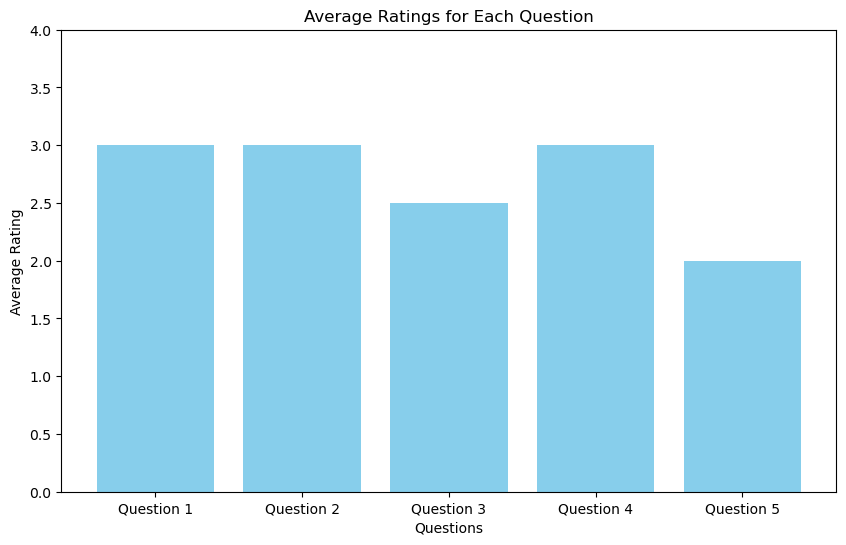

In [35]:
if __name__ == "__main__":
    main()


__name__ Check: Ensures that main() runs only if the script is executed directly, not if it’s imported as a module.

This code provides a complete workflow for collecting user feedback, analyzing it, and visualizing the results. It starts by collecting feedback, calculates and analyzes ratings, and finally presents the results both in text and graphical formats.

# Complete Function

In [ ]:
""""
import numpy as np
import matplotlib.pyplot as plt

def get_feedback(user_id):
    feedback = {}
    questions = [
        "How would you rate our service overall?",
        "How satisfied are you with the quality of our products?",
        "How would you rate the friendliness of our staff?",
        "How satisfied are you with the response time of our customer support?",
        "How likely are you to recommend us to others?"
    ]
    
    print(f"\nUser {user_id}'s Feedback:")
    for i, question in enumerate(questions, 1):
        while True:
            try:
                rating = int(input(f"Q{i}: {question} (0 to 4, where 0 means poor and 4 means excellent): "))
                if 0 <= rating <= 4:
                    break
                else:
                    print("Invalid input. Please enter a number between 0 and 4.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")

        feedback[f"Question_{i}_Rating"] = rating

    print("Thank you for your feedback!")
    return feedback

def calculate_average_ratings(all_feedbacks):
    num_questions = 5
    ratings = np.zeros((num_questions, len(all_feedbacks)))
    
    # Collect ratings for each question
    for i, feedback in enumerate(all_feedbacks):
        for q in range(num_questions):
            ratings[q, i] = feedback[f"Question_{q+1}_Rating"]
    
    # Calculate average ratings
    average_ratings = np.mean(ratings, axis=1)
    return average_ratings

def identify_low_rated_questions(average_ratings, threshold=2.0):
    # Determine which questions need improvement
    questions_to_improve = [i+1 for i, avg in enumerate(average_ratings) if avg <= threshold]
    return questions_to_improve

def visualize_feedback(average_ratings):
    # Plot average ratings
    questions = [f"Question {i+1}" for i in range(len(average_ratings))]
    
    plt.figure(figsize=(10, 6))
    plt.bar(questions, average_ratings, color='skyblue')
    plt.xlabel('Questions')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings for Each Question')
    plt.ylim(0, 4)  # Rating scale is from 0 to 4
    plt.show()

def main_analysis(all_feedbacks):
    average_ratings = calculate_average_ratings(all_feedbacks)
    questions_to_improve = identify_low_rated_questions(average_ratings)

    print("\nAnalysis of Feedback Ratings:")
    for i, avg_rating in enumerate(average_ratings, 1):
        print(f"Question {i}: Average Rating = {avg_rating:.2f}")

    if questions_to_improve:
        print(f"\nQuestions that may need improvement (Average Rating <= 2.0):")
        for q in questions_to_improve:
            print(f"  Question {q}")
    else:
        print("\nAll questions have satisfactory ratings.")
    
    # Optional: Visualize the feedback
    visualize_feedback(average_ratings)

def main():
    while True:
        try:
            num_users = int(input("How many users' feedback would you like to collect? "))
            if num_users > 0:
                break
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    all_feedbacks = []
    for user_id in range(1, num_users + 1):
        feedback = get_feedback(user_id)
        all_feedbacks.append(feedback)
    
    # Call the analysis function
    main_analysis(all_feedbacks)

if __name__ == "__main__":
    main()
    

"""

# Application:

1. Customer Service Improvement
Application: Businesses can use this system to gather feedback from customers regarding their service experiences.
Benefit: Helps identify strengths and weaknesses in customer service, allowing companies to make targeted improvements. For example, if feedback indicates long wait times, a business can address staffing or process issues.

2. Product Development
Application: Companies can collect feedback on products to understand customer satisfaction with different features and overall quality.
Benefit: Provides insights into which features are well-received and which need improvement, guiding product development and innovation. This can lead to more user-friendly and successful products.

3. Educational Institutions
Application: Schools, colleges, and universities can gather feedback from students about teaching methods, course content, and facilities.
Benefit: Helps educators and administrators improve teaching quality, course structure, and campus amenities, enhancing the overall educational experience.

4. Healthcare Services
Application: Hospitals and clinics can use feedback to evaluate patient satisfaction with medical care, staff interactions, and facility conditions.
Benefit: Identifies areas where patient care can be improved, contributing to better health outcomes and higher patient satisfaction.

5. Event Management
Application: Organizers of events (e.g., conferences, workshops, festivals) can collect attendee feedback on various aspects of the event, such as organization, content, and logistics.
Benefit: Helps improve future events by addressing issues reported by attendees, ensuring a better experience for future participants.

6. Online Platforms and Services
Application: Websites, mobile apps, and online services can use feedback to assess user satisfaction with the user interface, functionality, and overall experience.
Benefit: Provides actionable insights to improve user experience, leading to higher user retention and engagement.

8. Government and Public Services
Application: Government agencies can collect feedback on public services such as transportation, utility services, and community programs.
Benefit: Improves service delivery and addresses public concerns effectively, leading to increased public satisfaction and trust.

9. Marketing and Advertising
Application: Marketing teams can use feedback to evaluate the effectiveness of campaigns, advertisements, and promotional activities.
Benefit: Refines marketing strategies and messaging based on consumer responses, leading to more effective campaigns and better ROI.

10. Nonprofit Organizations
Application: Nonprofits can gather feedback from beneficiaries and donors about their programs, services, and impact.
Benefit: Enhances program effectiveness and donor engagement by addressing feedback and improving operational practices.


# Conclusion

The Feedback-Driven Improvement System is a powerful tool for organizations seeking to enhance their services, products, and overall user experience. By systematically collecting and analyzing user feedback, businesses and institutions can gain valuable insights into areas needing improvement and make data-driven decisions to address these areas.